In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('test_db.json',convert_dates=True)

In [3]:
df.tail()

,date,open,high,low,close,volume,symbol
6276,1999-11-05,84.62,88.37,84.00,88.31,3721500,aapl
6277,1999-11-04,82.06,85.37,80.62,83.62,3384700,aapl
6278,1999-11-03,81.62,83.25,81.00,81.50,2932700,aapl
6279,1999-11-02,78.00,81.69,77.31,80.25,3564600,aapl
6280,1999-11-01,80.00,80.69,77.37,77.62,2487300,aapl


In [4]:
df = df.drop(columns=['high','low','close','volume','symbol'])

In [5]:
df.set_index('date', inplace=True)

<Axes: xlabel='date'>

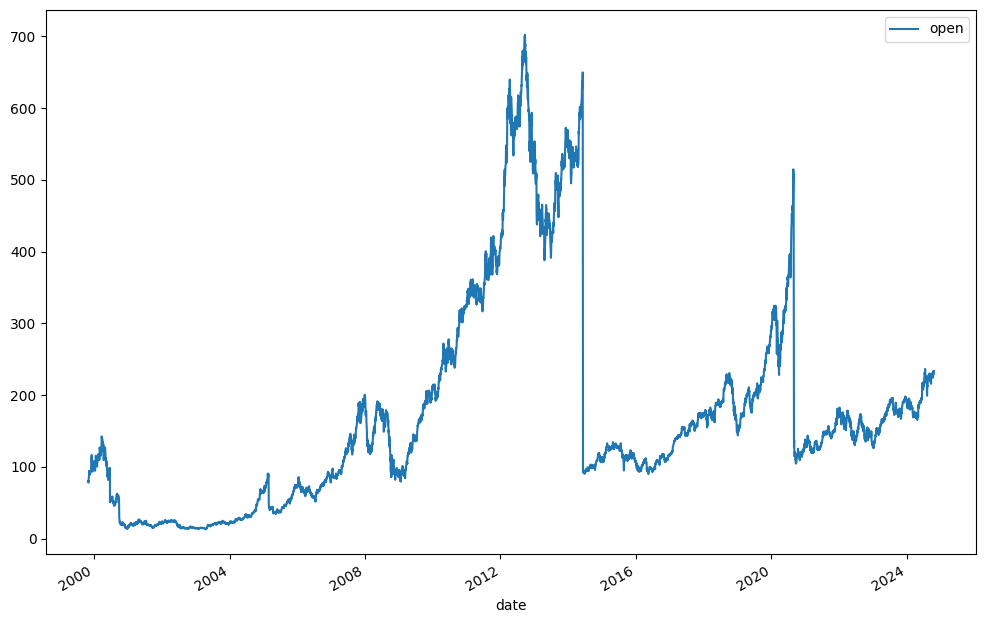

In [6]:
df.columns = ['open']
df.plot(figsize=(12,8))

In [7]:
lookback_range = 100
predict_range = 30

In [8]:
for i in range(1,lookback_range+1):
    df['open_'+str(i)+'dayback']=df['open'].shift(+i)

for i in range(1,predict_range+1):
    df['open_'+str(i)+'dayfuture']=df['open'].shift(-i)

C:\Users\Nirob\AppData\Local\Temp\ipykernel_19676\387917389.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['open_'+str(i)+'dayback']=df['open'].shift(+i)
C:\Users\Nirob\AppData\Local\Temp\ipykernel_19676\387917389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['open_'+str(i)+'dayfuture']=df['open'].shift(-i)
C:\Users\Nirob\AppData\Local\Temp\ipykernel_19676\387917389.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

In [9]:
df=df.dropna()
df

,open,open_1dayback,open_2dayback,open_3dayback,open_4dayback,open_5dayback,open_6dayback,open_7dayback,open_8dayback,open_9dayback,...,open_21dayfuture,open_22dayfuture,open_23dayfuture,open_24dayfuture,open_25dayfuture,open_26dayfuture,open_27dayfuture,open_28dayfuture,open_29dayfuture,open_30dayfuture
date,,,,,,,,,,,,,,,,,,,,,
2024-05-24,188.820,191.510,189.610,190.76,191.44,192.90,194.635,195.400,195.685,194.650,...,169.525,166.540,165.350,165.515,166.21,168.03,169.61,171.75,175.36,174.26
2024-05-23,190.980,188.820,191.510,189.61,190.76,191.44,192.900,194.635,195.400,195.685,...,166.540,165.350,165.515,166.210,168.03,169.61,171.75,175.36,174.26,168.34
2024-05-22,192.265,190.980,188.820,191.51,189.61,190.76,191.440,192.900,194.635,195.400,...,165.350,165.515,166.210,168.030,169.61,171.75,175.36,174.26,168.34,168.80
2024-05-21,191.090,192.265,190.980,188.82,191.51,189.61,190.760,191.440,192.900,194.635,...,165.515,166.210,168.030,169.610,171.75,175.36,174.26,168.34,168.80,168.70
2024-05-20,189.325,191.090,192.265,190.98,188.82,191.51,189.610,190.760,191.440,192.900,...,166.210,168.030,169.610,171.750,175.36,174.26,168.34,168.80,168.70,169.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-20,99.560,98.190,102.870,101.81,104.37,99.12,96.810,102.190,100.940,104.870,...,91.060,90.690,90.000,89.620,91.94,91.59,88.25,94.37,87.75,84.62
1999-12-17,100.870,99.560,98.190,102.87,101.81,104.37,99.120,96.810,102.190,100.940,...,90.690,90.000,89.620,91.940,91.59,88.25,94.37,87.75,84.62,82.06
1999-12-16,98.000,100.870,99.560,98.19,102.87,101.81,104.370,99.120,96.810,102.190,...,90.000,89.620,91.940,91.590,88.25,94.37,87.75,84.62,82.06,81.62


In [10]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [11]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [12]:
import numpy as np

x_data = []
for i in range(1, lookback_range+1):
    x = df['open_'+str(i)+'dayback']
    x = np.array(x)
    x = x.reshape(-1,1)
    x_data.append(x)

y_data = []
for i in range(1, predict_range+1):
    y = df['open_'+str(i)+'dayfuture']
    y = np.array(y)
    y = y.reshape(-1,1)
    y_data.append(y)
    
final_x = np.concatenate(x_data, axis=1)
final_y = np.concatenate(y_data, axis=1)

print(final_x, final_y)

[[191.51 189.61 190.76 ... 233.61 231.6  233.43]
 [188.82 191.51 189.61 ... 228.7  233.61 231.6 ]
 [190.98 188.82 191.51 ... 229.3  228.7  233.61]
 ...
 [100.87  99.56  98.19 ... 112.09 110.31 104.06]
 [ 98.   100.87  99.56 ... 110.81 112.09 110.31]
 [ 93.25  98.   100.87 ... 115.12 110.81 112.09]] [[190.98  192.265 191.09  ... 171.75  175.36  174.26 ]
 [192.265 191.09  189.325 ... 175.36  174.26  168.34 ]
 [191.09  189.325 189.51  ... 174.26  168.34  168.8  ]
 ...
 [ 93.25   98.37  102.39  ...  84.62   82.06   81.62 ]
 [ 98.37  102.39  105.31  ...  82.06   81.62   78.   ]
 [102.39  105.31  111.    ...  81.62   78.     80.   ]]


In [13]:
test_ratio = 0.2
test_sample_count = int(len(y) * test_ratio)

In [14]:
X_train,X_test,y_train,y_test=final_x[:-test_sample_count],final_x[-test_sample_count:],final_y[:-test_sample_count],final_y[-test_sample_count:]

In [15]:
print(y_test)

[[ 54.44  52.43  52.5  ...  36.97  37.4   37.04]
 [ 52.43  52.5   51.96 ...  37.4   37.04  38.1 ]
 [ 52.5   51.96  49.98 ...  37.04  38.1   37.73]
 ...
 [ 93.25  98.37 102.39 ...  84.62  82.06  81.62]
 [ 98.37 102.39 105.31 ...  82.06  81.62  78.  ]
 [102.39 105.31 111.   ...  81.62  78.    80.  ]]


In [16]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

In [17]:
def plot(plot_df):
    plt.rcParams["figure.figsize"] = (11,6)

    plt.plot(plot_df["dates"], plot_df["pred"], label='Linear_Regression_Predictions')
    plt.plot(plot_df["dates"], plot_df["groundtruth"], label='Actual Price')
    plt.legend(loc="upper left")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('gg.png', bbox_inches='tight')

In [18]:
pred=lin_model.predict(X_test)

[np.float64(51.602467538465945), np.float64(50.5881624457976), np.float64(50.104683675127305), np.float64(49.581680875275964), np.float64(48.89701166403606), np.float64(48.716273040233666), np.float64(48.425666772420776), np.float64(47.140176170593925), np.float64(46.826567394077536), np.float64(46.30985858421833), np.float64(46.41179694723494), np.float64(45.83079717883365), np.float64(45.9144661701812), np.float64(45.67053764217064), np.float64(44.85166381623962), np.float64(44.68777445923955), np.float64(44.7826610953413), np.float64(44.054275576615765), np.float64(43.844563616976465), np.float64(43.36701760690953), np.float64(42.94326537023676), np.float64(42.7976613716719), np.float64(42.33332536007541), np.float64(42.08685041181989), np.float64(41.69743271635348), np.float64(41.50757499741986), np.float64(41.46712483244066), np.float64(41.048706065812944), np.float64(41.0445427062168), np.float64(40.70598456499208), np.float64(40.217392173620304), np.float64(40.05099198780655), n

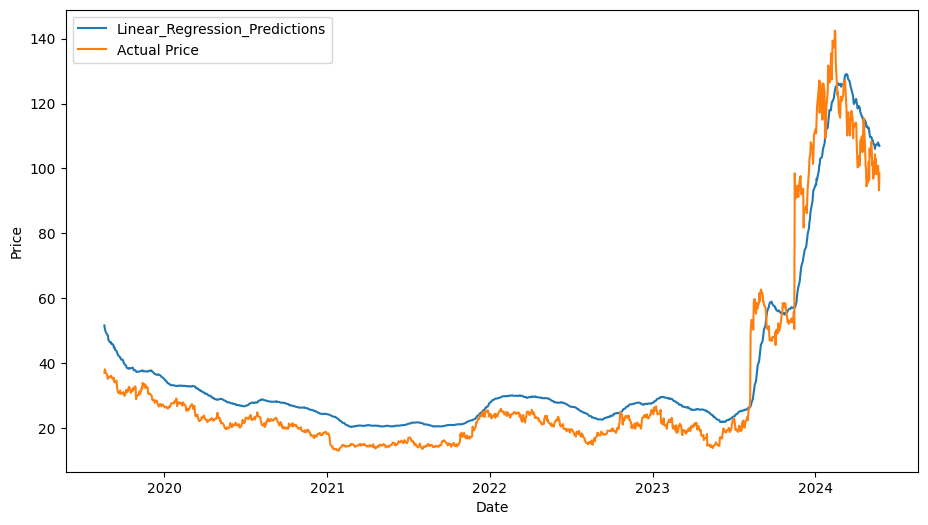

In [19]:
mean_pred = []
mean_groundtruth = []
predict_range = 30
for pred_i in range(predict_range, len(y_test)):
    v_p = 0
    v_gt = 0
    for inner_i, prev_i in enumerate(range(pred_i-predict_range, pred_i)):
        # print(prev_i, predict_range-1-inner_i)
        v_gt += y_test[prev_i][predict_range-1-inner_i]
        v_p += pred[prev_i][predict_range-1-inner_i]
    v_p /= predict_range
    v_gt /= predict_range
    mean_pred.append(v_p)
    mean_groundtruth.append(v_gt)
    

print(mean_pred)
print(mean_groundtruth)

data = {
    "dates": sorted(list(df.index))[df.shape[0]-len(mean_pred):],
    "pred": mean_pred,
    "groundtruth": mean_groundtruth
}

plot_df = pd.DataFrame(data)
plot(plot_df)

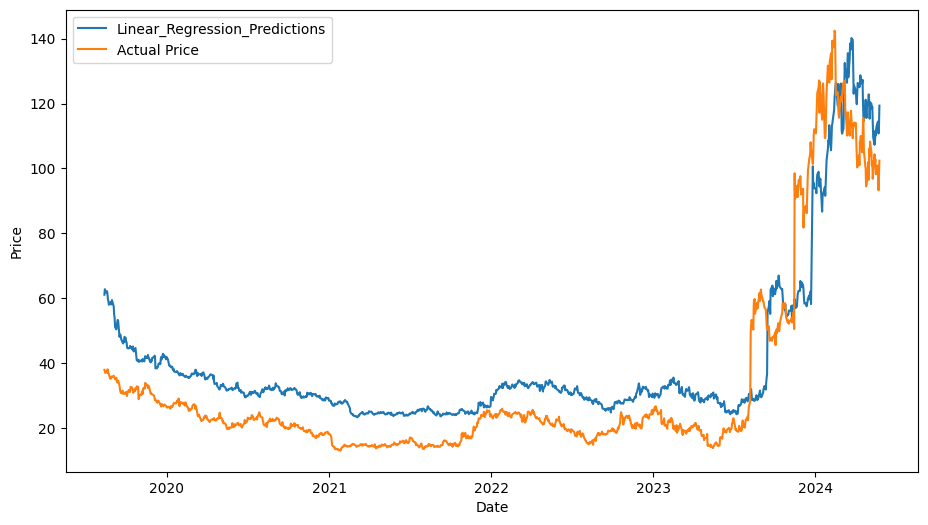

In [20]:
plot_pred = []
plot_groundtruth = []
lookforward_range = 25
for pred_i in range(0, len(y_test)-lookforward_range):
    v_gt = y_test[pred_i][lookforward_range]
    v_p = pred[pred_i][lookforward_range]
    plot_pred.append(v_p)
    plot_groundtruth.append(v_gt)
    
data = {
    "dates": sorted(list(df.index))[df.shape[0]-len(plot_pred):],
    "pred": plot_pred,
    "groundtruth": plot_groundtruth
}

plot_df = pd.DataFrame(data)
plot(plot_df)

In [36]:
a = np.array([[1,2]])
b = np.array([[3,4]])
c = np.concatenate( (a,b), axis=0)
print(np.append(b[1:], 5))
c = np.concatenate( (c, np.array(np.append(c[1][1:], 5))), axis=0)
print(c)

[5]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [38]:
print(np.append(c[1][1:], 5))

[4 5]


[100.87  98.    93.25  98.37 102.39 105.31 111.   116.25 116.56 114.56
 112.19 103.12 101.    98.12  94.25  94.75  93.    91.75  91.75  89.5
  91.06  90.69  90.    89.62  91.94  91.59  88.25  94.37  87.75  84.62]


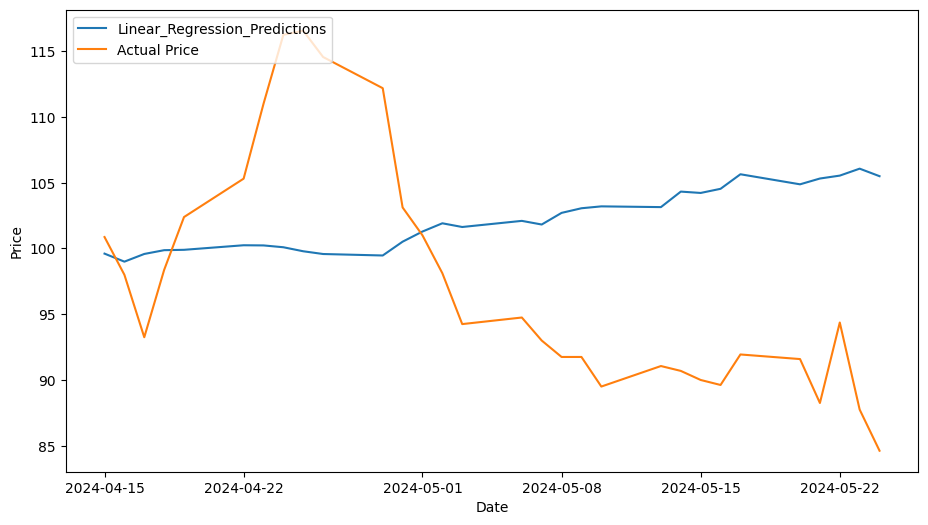

In [21]:
plot_pred = lin_model.predict([X_test[-5]])[0]
plot_groundtruth = y_test[-5] 
print(plot_groundtruth)

data = {
    "dates": sorted(list(df.index))[df.shape[0]-len(plot_pred):],
    "pred": plot_pred,
    "groundtruth": plot_groundtruth,
}

plot(pd.DataFrame(data))

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

NameError: name 'lin_pred' is not defined

In [150]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 9.839796422135116
Mean Squared Error for Linear Regression Model is: 9.839796422135116


In [151]:
print(lin_model.predict([X_test[0]]))

[[54.98957278 54.8793399  54.8214839  55.23557528 55.31857797 54.77207948
  54.77581175 55.15565144 55.62075057 55.37821362 55.29839477 55.28662015
  55.71235945 58.33528576 58.7994103  58.46144632 58.76167441 58.36313687
  59.97386926 60.24356122 60.45869677 59.87581051 59.8254225  60.10984395
  61.22180137 61.06716153 62.47524185 62.81696438 64.03852522 64.3966265 ]]


In [152]:
import joblib
joblib.dump(lin_model, "lin_model.pkl")

['lin_model.pkl']

In [224]:
from fpdf import FPDF

class PDF(FPDF):
    pass

mx = 15
my = 15


pdf = PDF('P', 'mm', 'Letter')
pdf.set_auto_page_break(True, margin=5)
pdf.add_font("tinos-regular", style="", fname="Tinos-Regular.ttf")
pdf.add_font("tinos-regular", style="B", fname="Tinos-Bold.ttf")
pdf.set_font(family='tinos-regular')

pdf.add_page()

plot_image_ratio = 1.8333
gap_between_text_and_image = 5
gap_between_two_plots = 10

x, y = mx, my+5

pdf.set_font(size=20, style='B')
pdf.text(x=x, y=y, text="Results of Linear regression prediction")

pdf.set_font(size=12)
x, y = x, y+20
pdf.text(x=x, y=y, text="Plot for means of 30 day price predictions")
w, h, x, y = plot_image_ratio*80, 80, x, y + gap_between_text_and_image
pdf.image('gg.png', w=w, h=h, x=x, y=y)

x, y = x, y + h + gap_between_two_plots
pdf.text(x=x, y=y, text="Plot for the comparison of predicted and actual prices of 25th day into the future")
w, h, x, y = w, h, x, y + gap_between_text_and_image
pdf.image('gg.png', w=w, h=h, x=x, y=y)

pdf.add_page()
x, y = mx, my+5
pdf.text(x=x, y=y, text="Plot for comparing prediction of only 30days into the future")
w, h, x, y = w, h, x, y + gap_between_text_and_image
pdf.image('gg.png', w=w, h=h, x=x, y=y)

pdf.output('test.pdf')
